In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [43]:
train_raw = pd.read_csv('data/train.csv',index_col = 'Id')
train_raw

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900


In [109]:
df = train_raw.iloc[:,np.r_[22:41,79]]
df.head(5)


,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,SalePrice
Id,,,,,,,,,,,,,,,,,,,,
1,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,208500
2,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,181500
3,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,223500
4,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,140000
5,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,250000


In [110]:
df.describe()

,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,SalePrice
count,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,103.685262,443.639726,46.549315,567.240411,1057.429452,180921.195890
std,181.066207,456.098091,161.319273,441.866955,438.705324,79442.502883
min,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,0.000000,0.000000,0.000000,223.000000,795.750000,129975.000000
50%,0.000000,383.500000,0.000000,477.500000,991.500000,163000.000000
75%,166.000000,712.250000,0.000000,808.000000,1298.250000,214000.000000
max,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,755000.000000


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 20 columns):
Exterior1st     1460 non-null object
Exterior2nd     1460 non-null object
MasVnrType      1452 non-null object
MasVnrArea      1452 non-null float64
ExterQual       1460 non-null object
ExterCond       1460 non-null object
Foundation      1460 non-null object
BsmtQual        1423 non-null object
BsmtCond        1423 non-null object
BsmtExposure    1422 non-null object
BsmtFinType1    1423 non-null object
BsmtFinSF1      1460 non-null int64
BsmtFinType2    1422 non-null object
BsmtFinSF2      1460 non-null int64
BsmtUnfSF       1460 non-null int64
TotalBsmtSF     1460 non-null int64
Heating         1460 non-null object
HeatingQC       1460 non-null object
CentralAir      1460 non-null object
SalePrice       1460 non-null int64
dtypes: float64(1), int64(5), object(14)
memory usage: 239.5+ KB


In [112]:
df.isnull().sum().sort_values(ascending = False)


BsmtExposure    38
BsmtFinType2    38
BsmtCond        37
BsmtFinType1    37
BsmtQual        37
MasVnrType       8
MasVnrArea       8
Exterior2nd      0
ExterQual        0
ExterCond        0
Foundation       0
SalePrice        0
CentralAir       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
Exterior1st      0
dtype: int64

	
***MasVnrType***: Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone
	
***MasVnrArea***: Masonry veneer area in square feet

***BsmtQual***: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement
		
***BsmtCond***: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement
	
***BsmtExposure***: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement
	
***BsmtFinType1***: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

***BsmtFinType2***: Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement



In [113]:
df_null = df[df.isnull().any(axis=1)]
# columns with NAs
col_null = ['BsmtExposure','BsmtFinType2','BsmtQual','BsmtFinType1','BsmtCond','MasVnrType','MasVnrArea']
df_null[col_null]

,BsmtExposure,BsmtFinType2,BsmtQual,BsmtFinType1,BsmtCond,MasVnrType,MasVnrArea
Id,,,,,,,
18,NaN,NaN,NaN,NaN,NaN,None,0.0
40,NaN,NaN,NaN,NaN,NaN,None,0.0
91,NaN,NaN,NaN,NaN,NaN,None,0.0
103,NaN,NaN,NaN,NaN,NaN,None,0.0
157,NaN,NaN,NaN,NaN,NaN,None,0.0
183,NaN,NaN,NaN,NaN,NaN,BrkFace,98.0
235,No,Unf,Gd,GLQ,TA,NaN,NaN
260,NaN,NaN,NaN,NaN,NaN,None,0.0
333,No,NaN,Gd,GLQ,TA,BrkFace,296.0


In [114]:
#check value counts of columns with NAs
for col in col_null:
    print(col, df[col].value_counts(),sep='\n')

BsmtExposure
No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64
BsmtFinType2
Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64
BsmtQual
TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64
BsmtFinType1
Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64
BsmtCond
TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64
MasVnrType
None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64
MasVnrArea
0.0       861
72.0        8
180.0       8
108.0       8
120.0       7
16.0        7
80.0        6
200.0       6
106.0       6
340.0       6
170.0       5
132.0       5
360.0       5
84.0        5
320.0       5
100.0       4
196.0       4
246.0       4
216.0       4
160.0       4
183.0       4
178.0       4
270.0       4
300.0       4
210.0       4
268.0       4
252.0       4
168.0       4
336.0       4
220.0

### Bsmt-NA
all missing values are category NA, which means that no basement.

Value of  BsmtQual, BsmtCond,BsmtExposure, BsmtFinType should be NA at the same time, meaning no basement.

For BsmtFinType2, it could be NA while other Bsmtcolumns above are not NA. Under this case, it means that house has only one type of basement which is Type1.

however the frequency of NAs of Bsmt cols are different.
BsmtExposure    38
BsmtFinType2    38
BsmtQual        37
BsmtFinType1    37
BsmtCond        37

it may indicate a typo

BsmtExposure explaination: https://adampillmore.wordpress.com/2010/02/15/basements/

In [191]:
# based on other Bsmt info, ID949 should have a basement
# we could impute this BsmtExposure with the mode of Exposures
# or impute this info based on the relationship 
# between LandSlope and BsmtExposure 
# fill ID949 BsmtExposure with mode
print(df.BsmtExposure.mode())
df.loc[949,'BsmtExposure'] = 'No'
df.loc[949,'BsmtExposure']

0    No
dtype: object


'No'

### fillna

In [200]:
#fill NAs with 'NA'
df=df.fillna('NA')
df.isnull().sum().sort_values(ascending = False)

SalePrice       0
CentralAir      0
Exterior2nd     0
MasVnrType      0
MasVnrArea      0
ExterQual       0
ExterCond       0
Foundation      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinSF1      0
BsmtFinType2    0
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
Heating         0
HeatingQC       0
Exterior1st     0
dtype: int64

### Categorical variables
Exterior1st     
Exterior2nd     
MasVnrType      
ExterQual   
ExterCond   
Foundation  
BsmtQual    
BsmtCond    
BsmtExposure 

BsmtFinType1

BsmtFinType2

Heating    
HeatingQC   
CentralAir  

#### Exterior

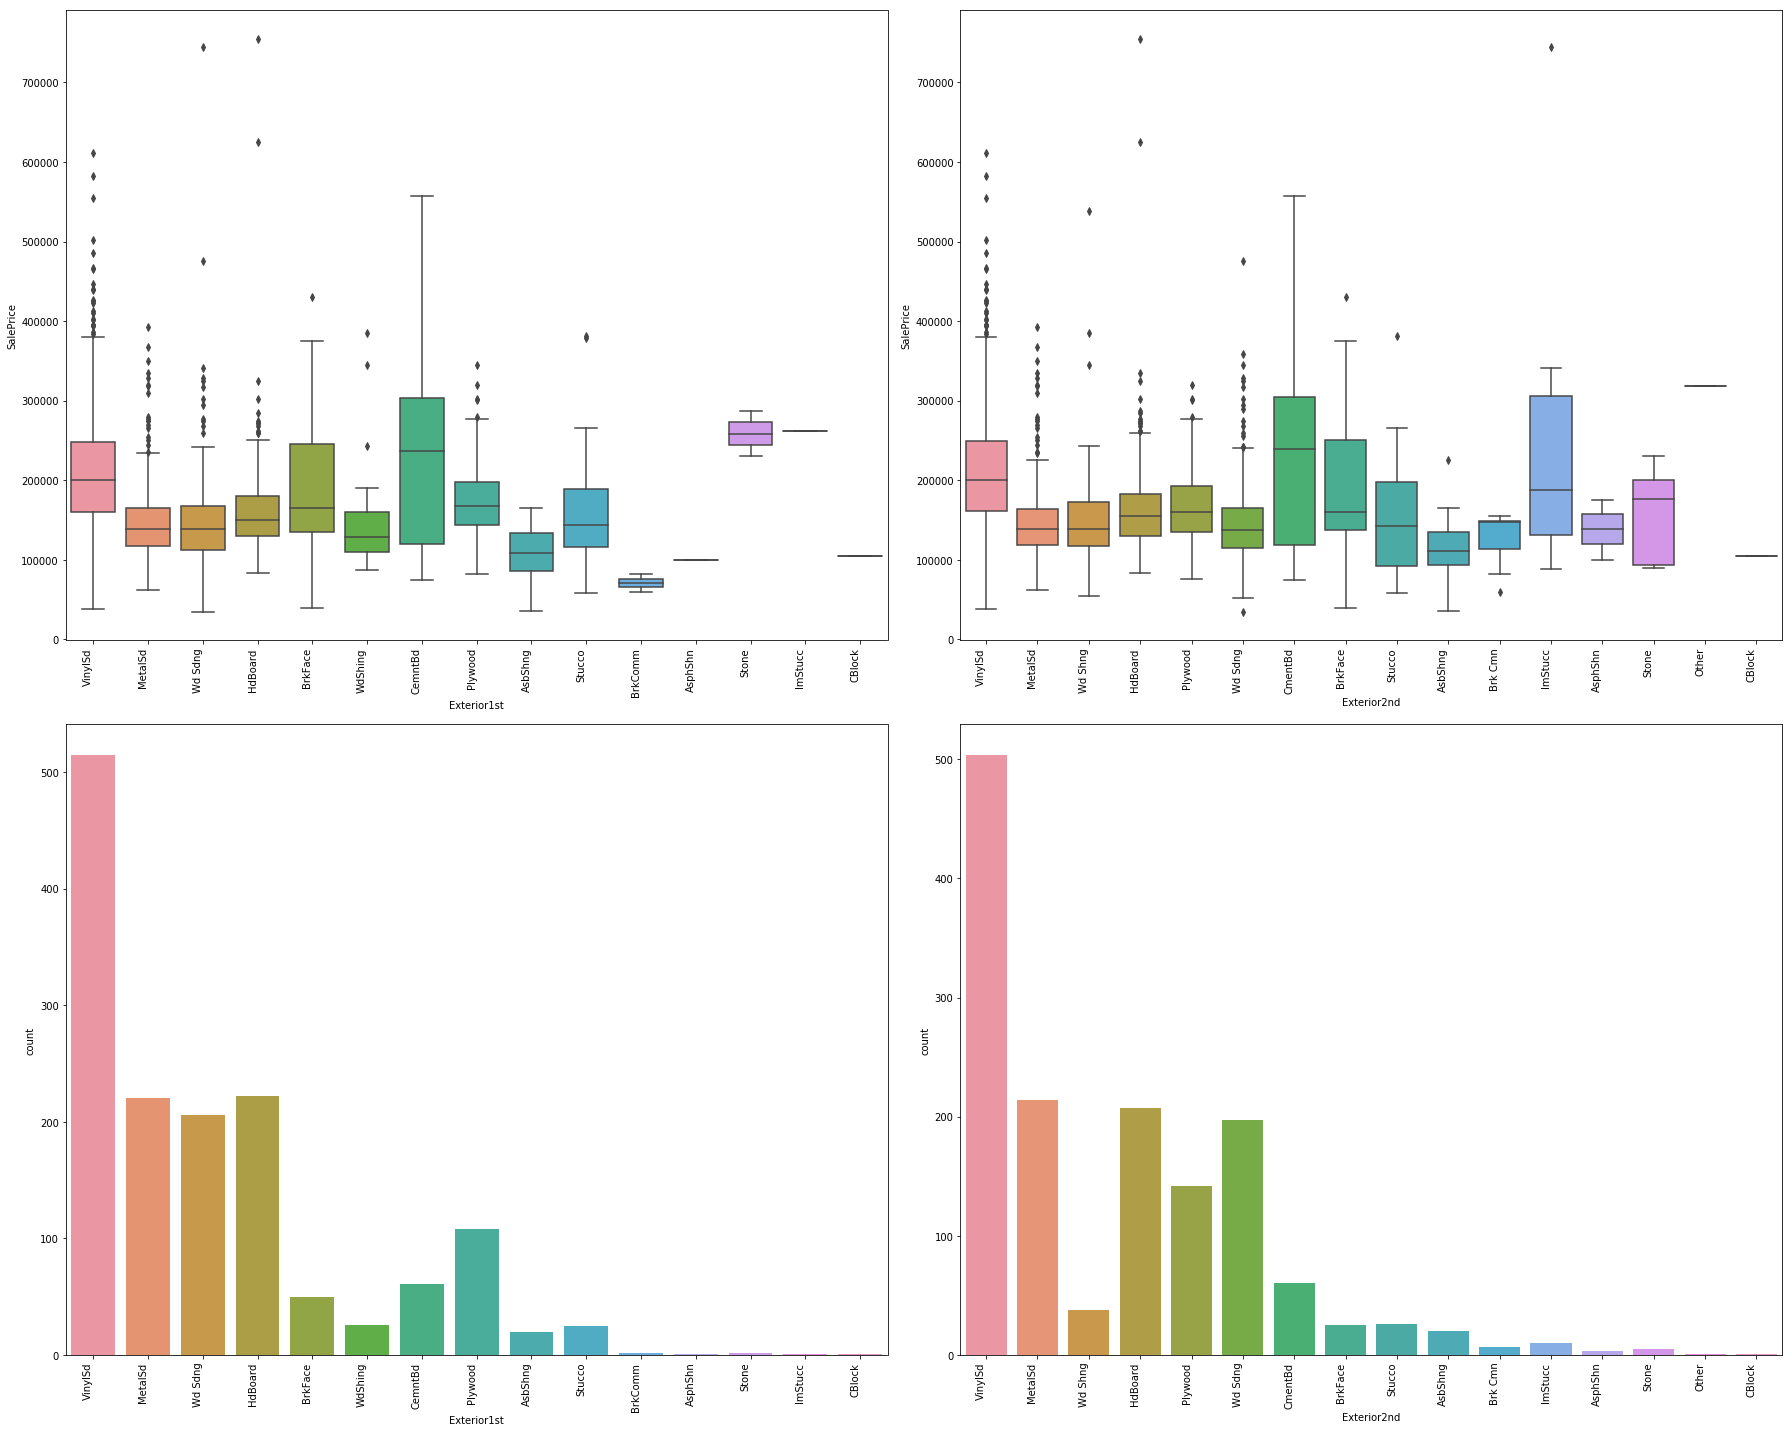

In [221]:

figExterior = plt.figure(figsize=(25, 20))
#exterior1st_boxplot
ax1=figExterior.add_subplot(2,2,1)
E1=sns.boxplot(y=df.SalePrice, x=df.Exterior1st)
E1.set_xticklabels(E1.get_xticklabels(), rotation=90, ha="right")

#exterior2nd_boxplot
ax2=figExterior.add_subplot(2,2,2)
E2=sns.boxplot(y=df.SalePrice, x=df.Exterior2nd)
E2.set_xticklabels(E2.get_xticklabels(), rotation=90, ha="right")

#countplot
#E1st
ax3=figExterior.add_subplot(2,2,3)
E1_count=sns.countplot(data=df,x='Exterior1st')
E1_count.set_xticklabels(E1_count.get_xticklabels(), rotation=90, ha="right")

#E2nd
ax4=figExterior.add_subplot(2,2,4)
E2_count=sns.countplot(data=df,x='Exterior2nd')
E2_count.set_xticklabels(E2_count.get_xticklabels(), rotation=90, ha="right")

plt.tight_layout()
            


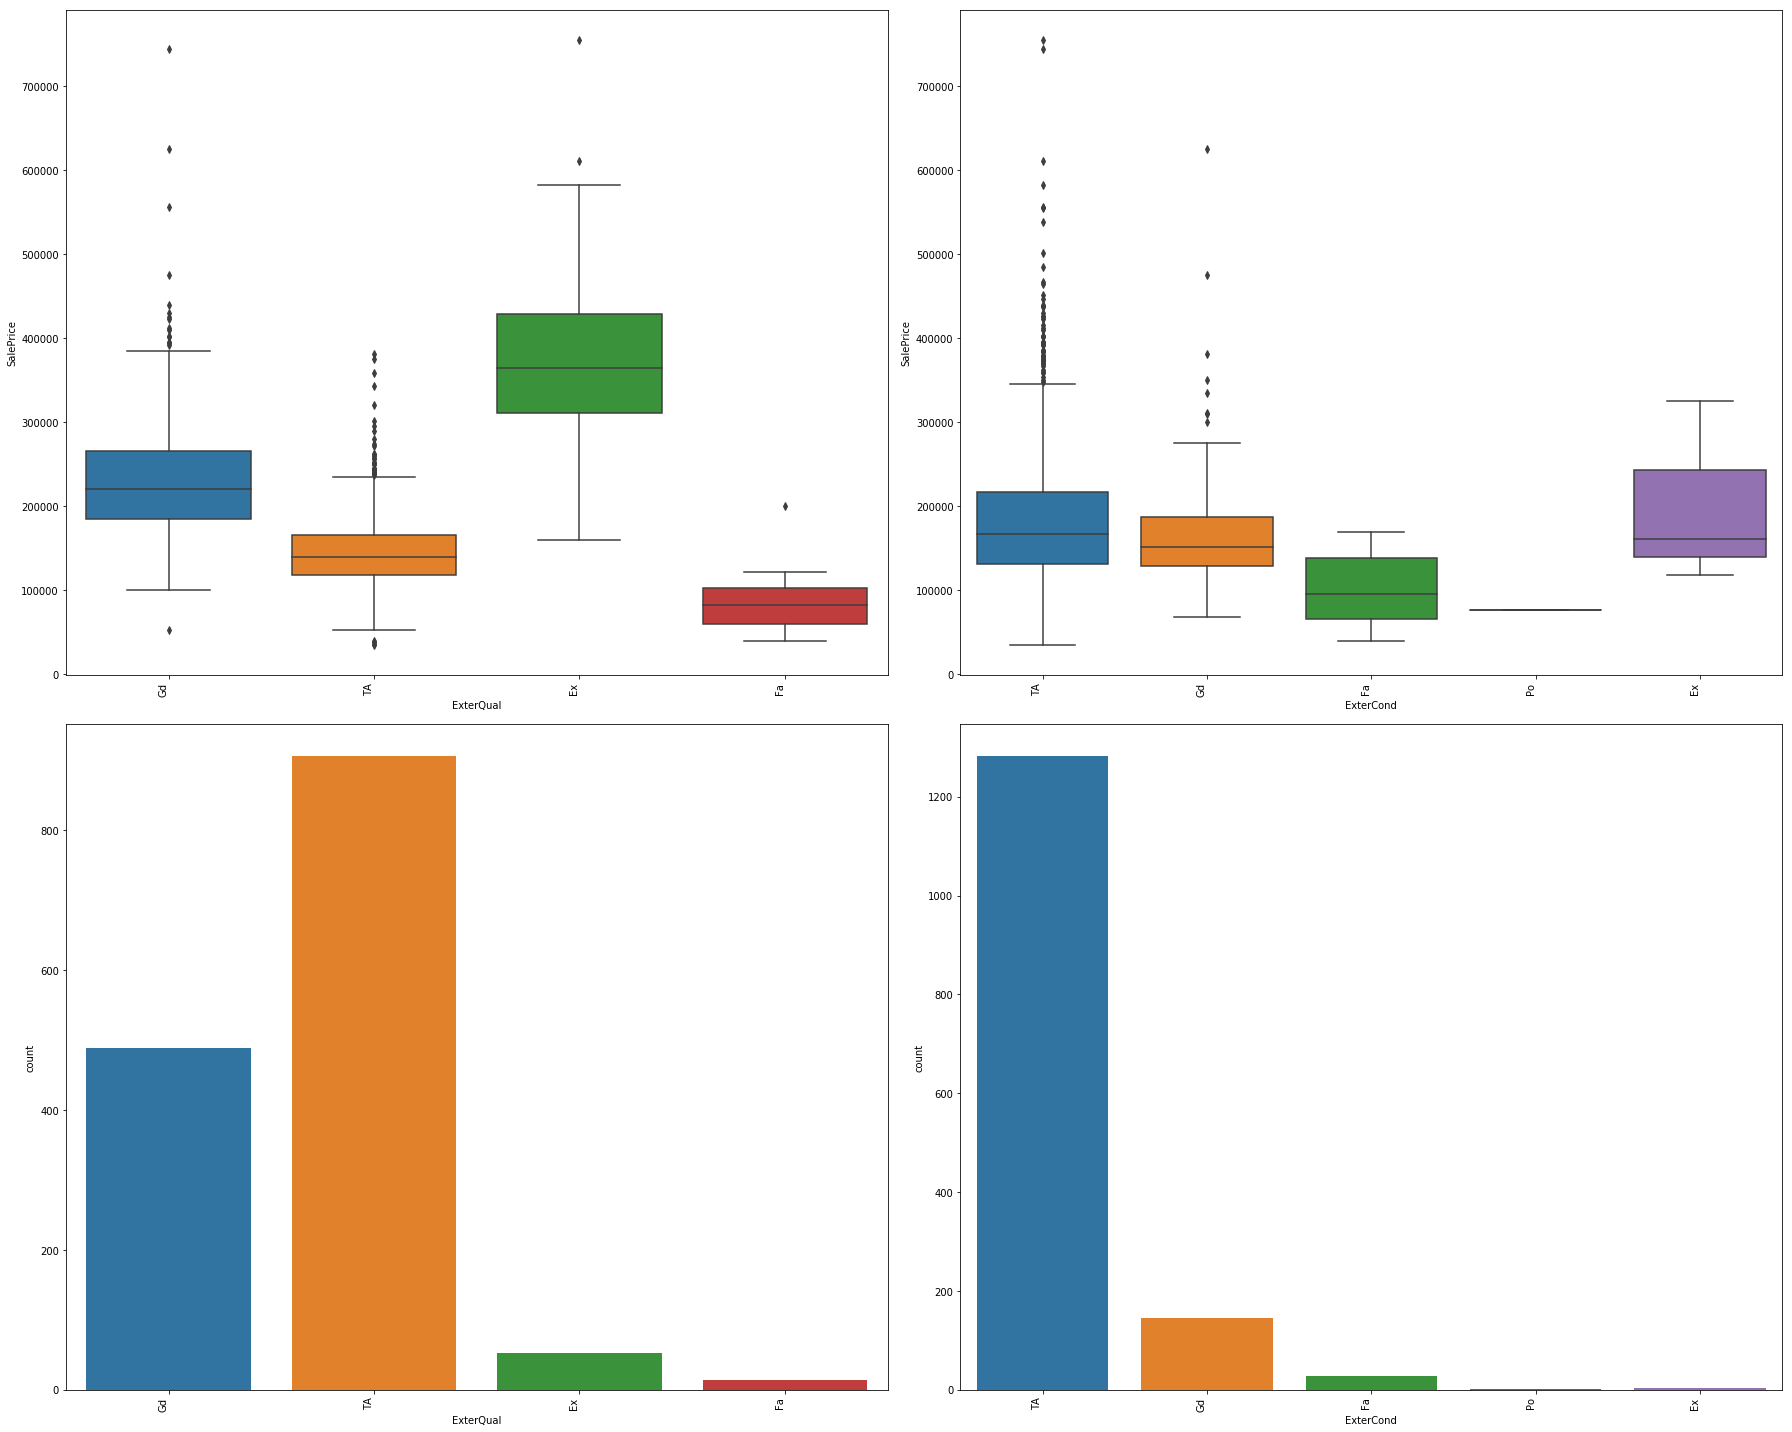

In [219]:
figExterior_ = plt.figure(figsize=(25, 20))
#exterior1st_boxplot
ax1=figExterior_.add_subplot(2,2,1)
EQ=sns.boxplot(y=df.SalePrice, x=df.ExterQual)
EQ.set_xticklabels(EQ.get_xticklabels(), rotation=90, ha="right")

#exterior2nd_boxplot
ax2=figExterior_.add_subplot(2,2,2)
EC=sns.boxplot(y=df.SalePrice, x=df.ExterCond)
EC.set_xticklabels(EC.get_xticklabels(), rotation=90, ha="right")

#countplot
#E1st
ax3=figExterior_.add_subplot(2,2,3)
EQ_count=sns.countplot(data=df,x='ExterQual')
EQ_count.set_xticklabels(EQ_count.get_xticklabels(), rotation=90, ha="right")

#E2nd
ax4=figExterior_.add_subplot(2,2,4)
EC_count=sns.countplot(data=df,x='ExterCond')
EC_count.set_xticklabels(EC_count.get_xticklabels(), rotation=90, ha="right")

plt.tight_layout()

In [224]:
pd.crosstab(df.ExterQual,df.ExterCond)

ExterCond,Ex,Fa,Gd,Po,TA
ExterQual,,,,,
Ex,1,0,3,0,48
Fa,0,6,0,0,8
Gd,0,0,35,0,453
TA,2,22,108,1,773


### basement

- BsmtQual
- BsmtCond
- BsmtExposure
- BsmtFinType1
- BsmtFinType2

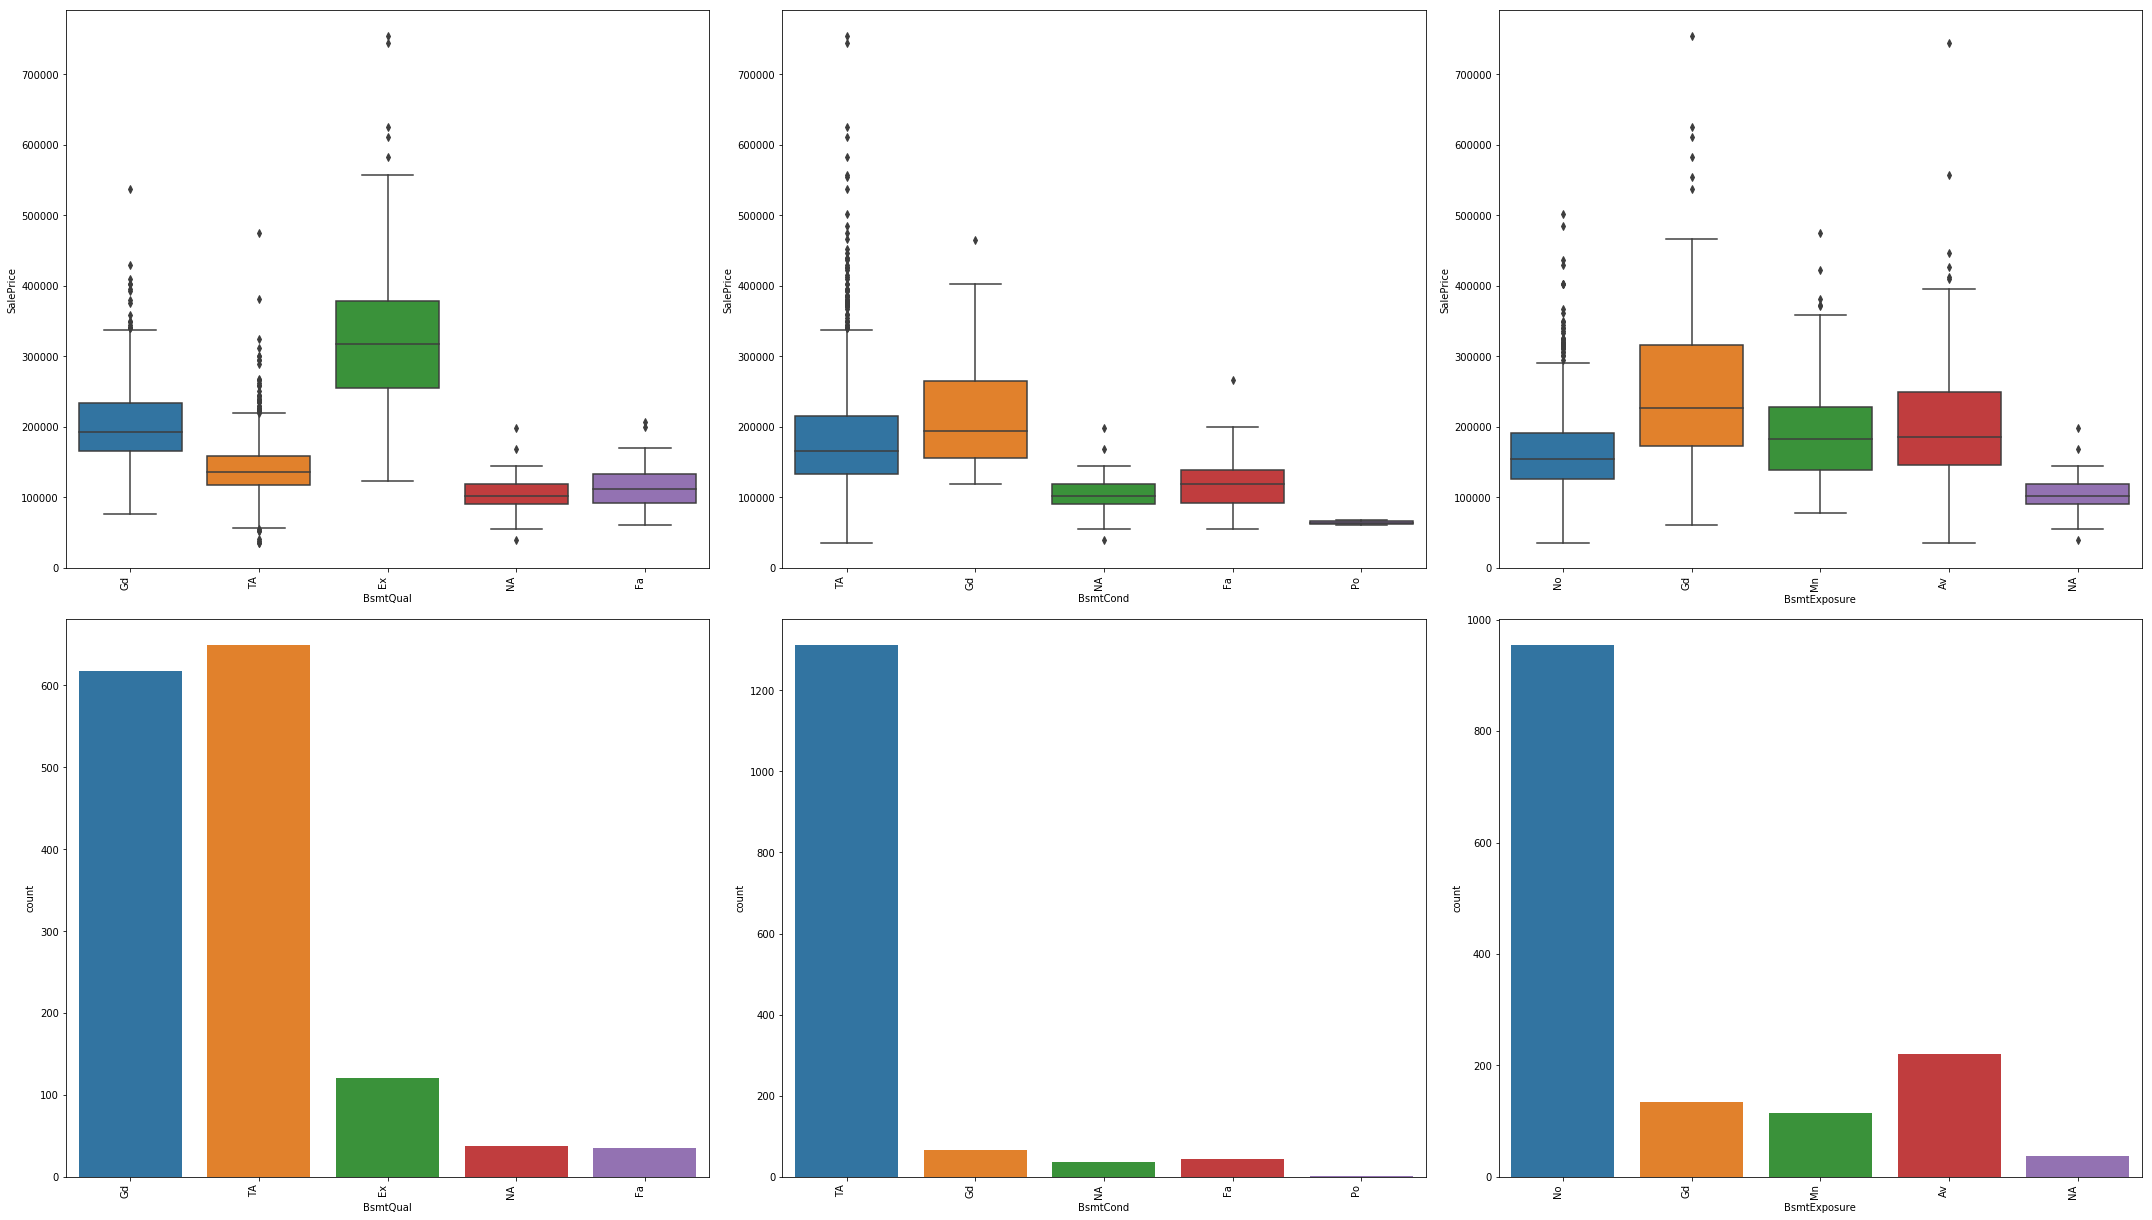

In [218]:
figBsmt = plt.figure(figsize=(30, 25))

ax1=figBsmt.add_subplot(3,3,1)
BQ=sns.boxplot(y=df.SalePrice, x=df.BsmtQual)
BQ.set_xticklabels(BQ.get_xticklabels(), rotation=90, ha="right")

ax2=figBsmt.add_subplot(3,3,2)
BC=sns.boxplot(y=df.SalePrice, x=df.BsmtCond)
BC.set_xticklabels(BC.get_xticklabels(), rotation=90, ha="right")

ax3=figBsmt.add_subplot(3,3,3)
BE=sns.boxplot(y=df.SalePrice, x=df.BsmtExposure)
BE.set_xticklabels(BE.get_xticklabels(), rotation=90, ha="right")

#countplot
ax4=figBsmt.add_subplot(3,3,4)
BQ_count=sns.countplot(data=df,x='BsmtQual')
BQ_count.set_xticklabels(BQ_count.get_xticklabels(), rotation=90, ha="right")

ax5=figBsmt.add_subplot(3,3,5)
BC_count=sns.countplot(data=df,x='BsmtCond')
BC_count.set_xticklabels(BC_count.get_xticklabels(), rotation=90, ha="right")

ax6=figBsmt.add_subplot(3,3,6)
BE_count=sns.countplot(data=df,x='BsmtExposure')
BE_count.set_xticklabels(BE_count.get_xticklabels(), rotation=90, ha="right")


plt.tight_layout()

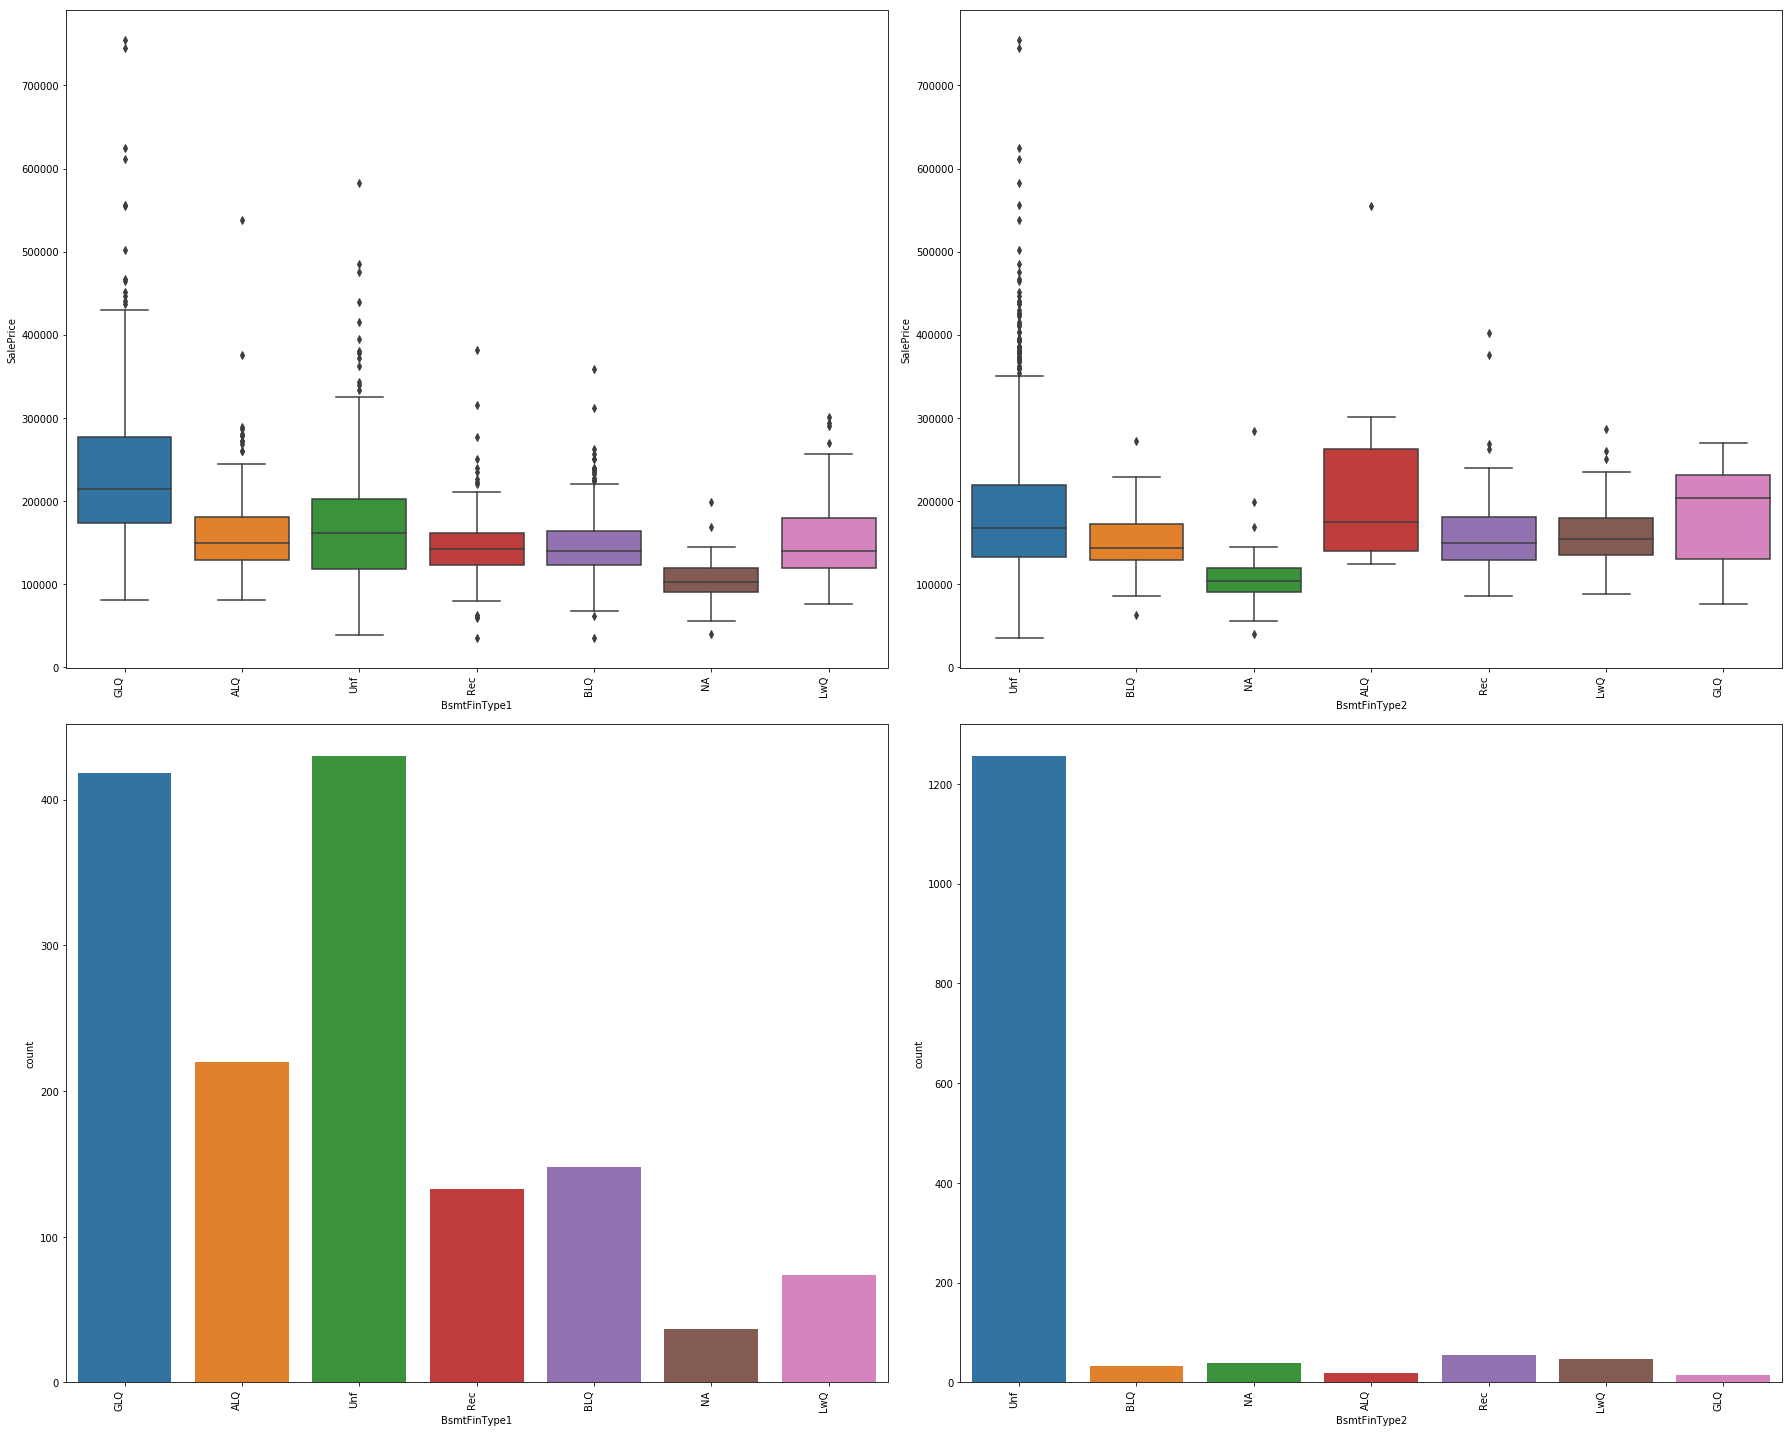

In [217]:
figBsmt_ = plt.figure(figsize=(25, 20))

ax1=figBsmt_.add_subplot(2,2,1)
BT1=sns.boxplot(y=df.SalePrice, x=df.BsmtFinType1)
BT1.set_xticklabels(BT1.get_xticklabels(), rotation=90, ha="right")

ax2=figBsmt_.add_subplot(2,2,2)
BT2=sns.boxplot(y=df.SalePrice, x=df.BsmtFinType2)
BT2.set_xticklabels(BT2.get_xticklabels(), rotation=90, ha="right")

ax1=figBsmt_.add_subplot(2,2,3)
BT1_count=sns.countplot(data=df,x='BsmtFinType1')
BT1_count.set_xticklabels(BT1_count.get_xticklabels(), rotation=90, ha="right")

ax2=figBsmt_.add_subplot(2,2,4)
BT2_count=sns.countplot(data=df,x='BsmtFinType2')
BT2_count.set_xticklabels(BT2_count.get_xticklabels(), rotation=90, ha="right")

plt.tight_layout()

### heating and others
- Heating
- HeatingQC
- CentralAir
- MasVnrType
- Foundation

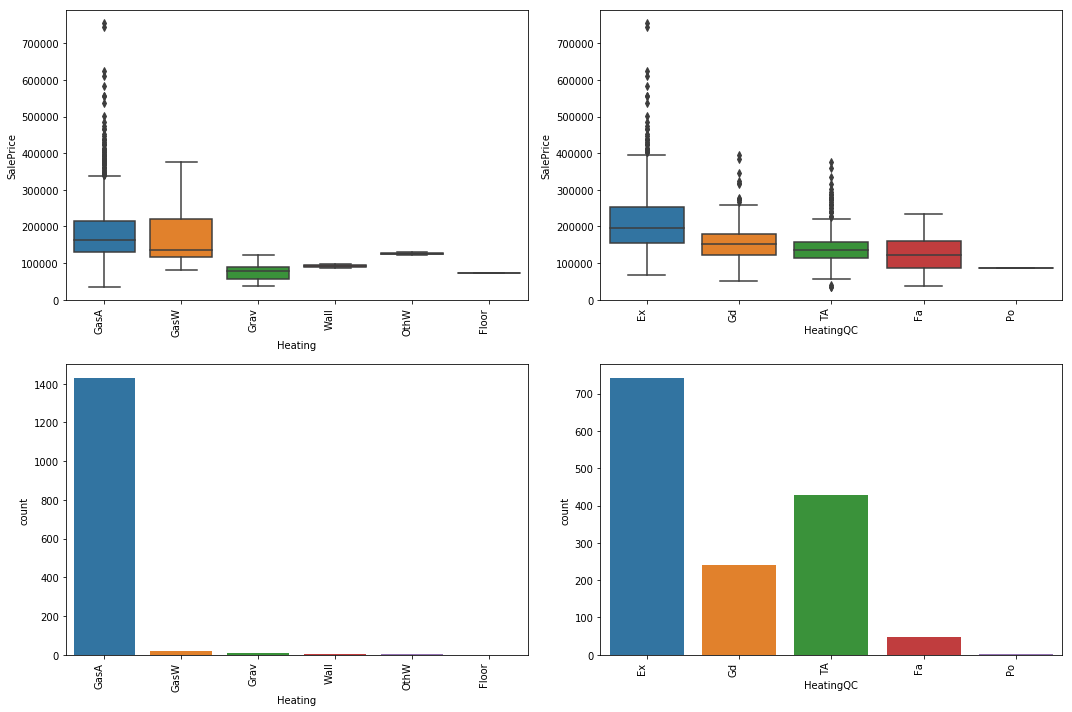

In [210]:
# heating
figHeating = plt.figure(figsize=(15, 10))

ax1=figHeating.add_subplot(2,2,1)
H=sns.boxplot(y=df.SalePrice, x=df.Heating)
H.set_xticklabels(H.get_xticklabels(), rotation=90, ha="right")


ax2=figHeating.add_subplot(2,2,2)
HQC=sns.boxplot(y=df.SalePrice, x=df.HeatingQC)
HQC.set_xticklabels(HQC.get_xticklabels(), rotation=90, ha="right")

ax3=figHeating.add_subplot(2,2,3)
H_count=sns.countplot(data=df,x='Heating')
H_count.set_xticklabels(H_count.get_xticklabels(), rotation=90, ha="right")


ax4=figHeating.add_subplot(2,2,4)
HQC_count=sns.countplot(data=df,x='HeatingQC')
HQC_count.set_xticklabels(HQC_count.get_xticklabels(), rotation=90, ha="right")

plt.tight_layout()



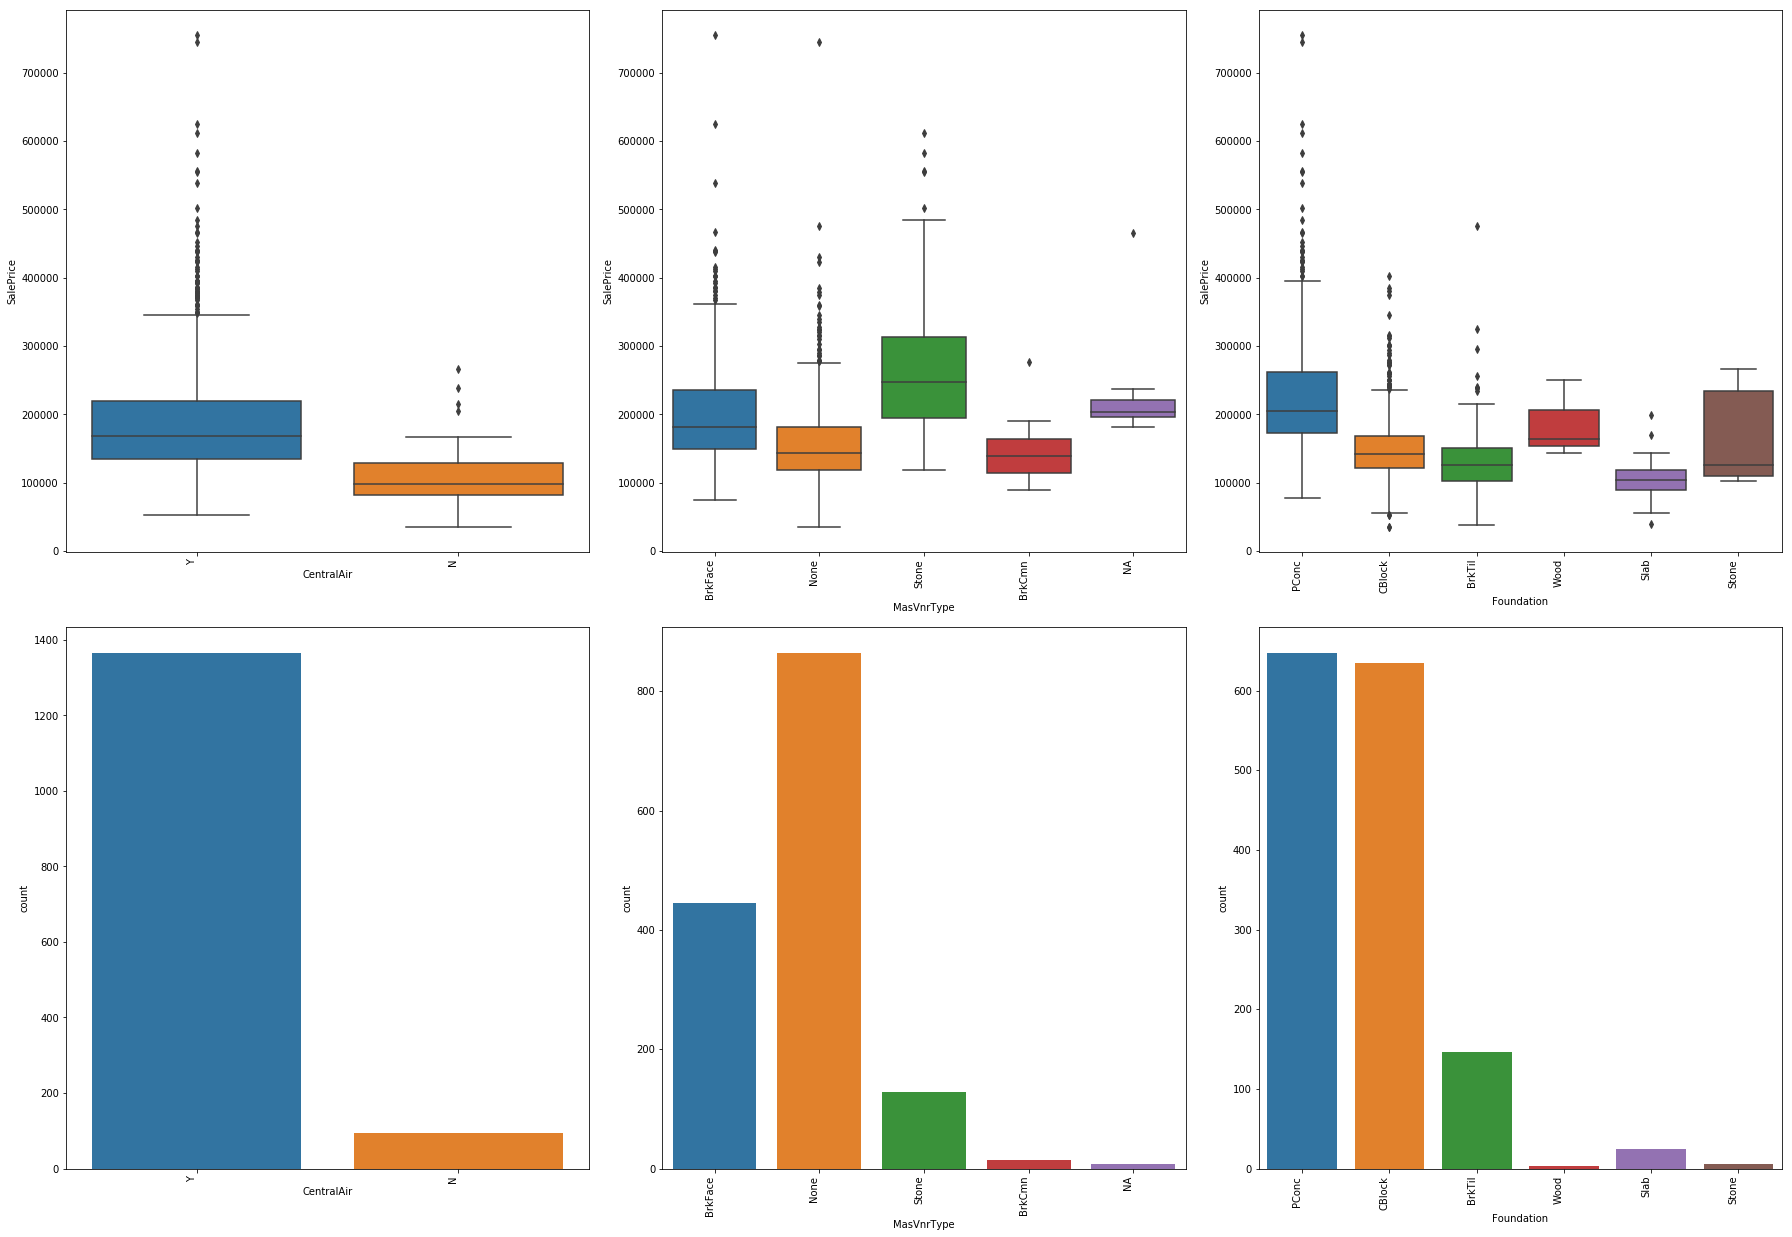

In [215]:

figOther = plt.figure(figsize=(25, 25))

ax1=figOther.add_subplot(3,3,1)
CentralAir=sns.boxplot(y=df.SalePrice, x=df.CentralAir)
CentralAir.set_xticklabels(CentralAir.get_xticklabels(), rotation=90, ha="right")

ax2=figOther.add_subplot(3,3,2)
MasVnrType=sns.boxplot(y=df.SalePrice, x=df.MasVnrType)
MasVnrType.set_xticklabels(MasVnrType.get_xticklabels(), rotation=90, ha="right")

ax3=figOther.add_subplot(3,3,3)
Foundation=sns.boxplot(y=df.SalePrice, x=df.Foundation)
Foundation.set_xticklabels(Foundation.get_xticklabels(), rotation=90, ha="right")

#countplot
ax4=figOther.add_subplot(3,3,4)
CentralAir_count=sns.countplot(data=df,x='CentralAir')
CentralAir_count.set_xticklabels(CentralAir_count.get_xticklabels(), rotation=90, ha="right")

ax5=figOther.add_subplot(3,3,5)
MasVnrType_count=sns.countplot(data=df,x='MasVnrType')
MasVnrType_count.set_xticklabels(MasVnrType_count.get_xticklabels(), rotation=90, ha="right")

ax6=figOther.add_subplot(3,3,6)
Foundation_count=sns.countplot(data=df,x='Foundation')
Foundation_count.set_xticklabels(Foundation_count.get_xticklabels(), rotation=90, ha="right")


plt.tight_layout()

### continuous

/Users/wzp/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/wzp/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


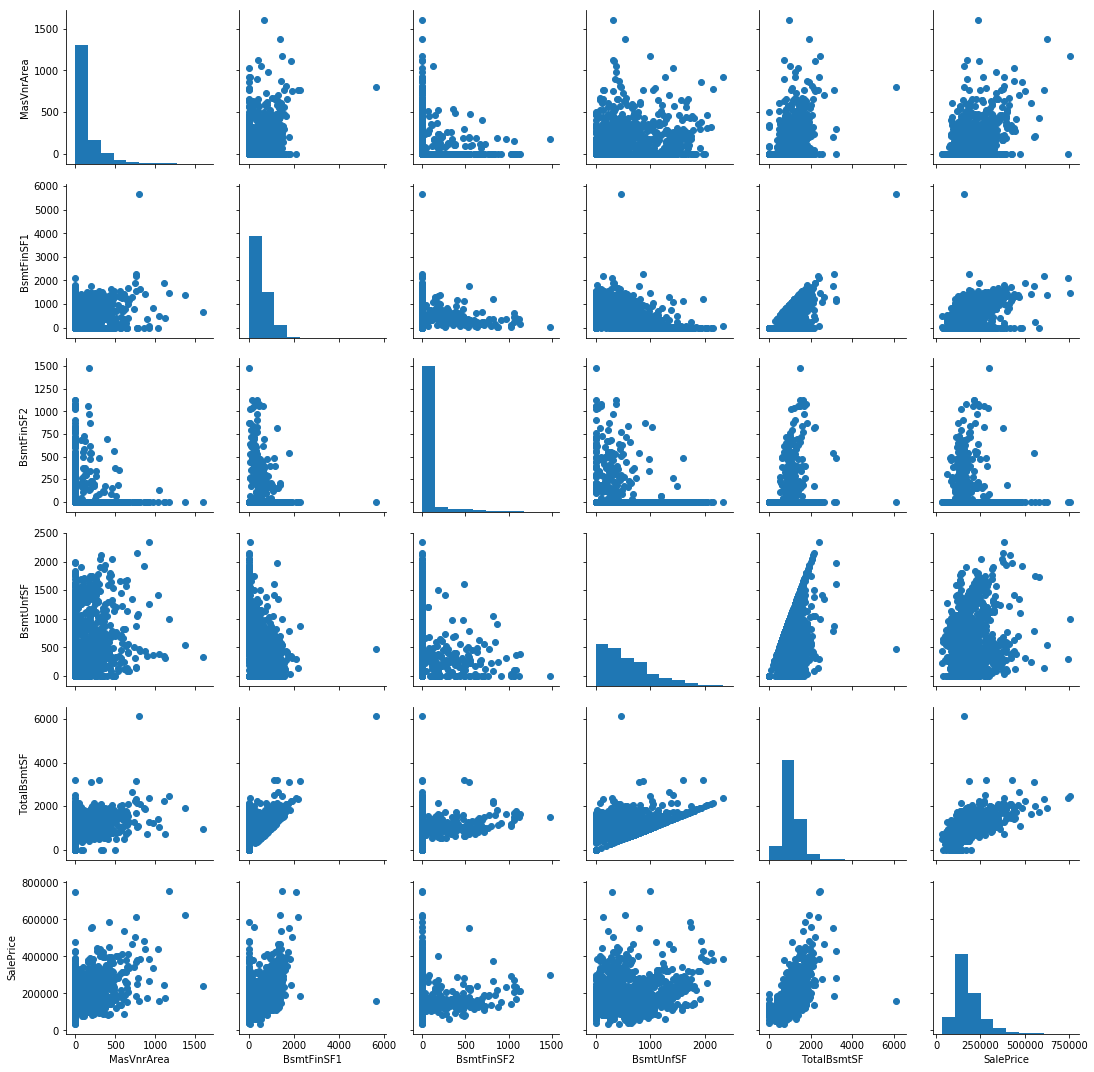

In [118]:
g = sns.PairGrid(df)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)